In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [35]:
salary1 = pd.read_csv("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Linear Regression/Salary_Data.csv")

In [36]:
salary1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [37]:
salary1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [38]:
salary1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [39]:
sal_sqrt = np.sqrt(salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c3fcf9ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x23c3fd080a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c3fcf97f0>],
 'medians': [<matplotlib.lines.Line2D at 0x23c3fd08640>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c3fd08910>],
 'means': []}

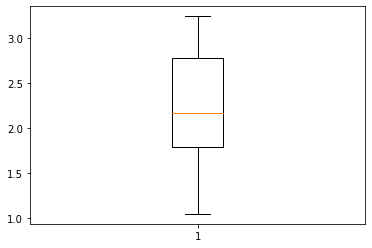

In [40]:
plt.boxplot(sal_sqrt['YearsExperience'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

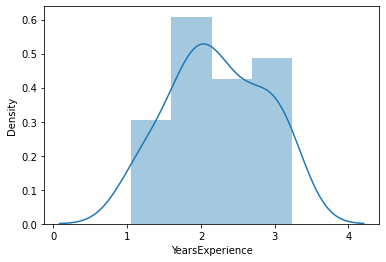

In [58]:
sns.distplot(sal_sqrt['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23c3fdc1bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x23c3fdd0190>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c3fdc18e0>],
 'medians': [<matplotlib.lines.Line2D at 0x23c3fdd0730>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c3fdd0a00>],
 'means': []}

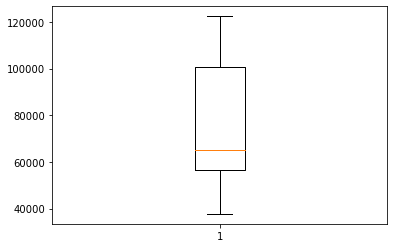

In [42]:
plt.boxplot(salary1['Salary'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

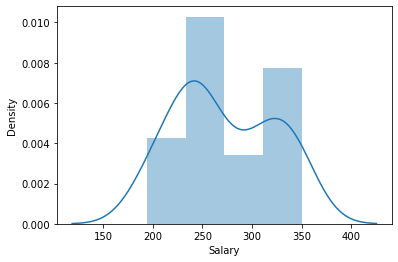

In [43]:
sns.distplot(sal_sqrt['Salary'])

In [44]:
salary = salary1.rename(columns={"YearsExperience":"exp","Salary":"sal"})

In [45]:
salary.head()

,exp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Correlation

In [46]:
salary.corr()

,exp,sal
exp,1.000000,0.978242
sal,0.978242,1.000000


<AxesSubplot:xlabel='exp', ylabel='sal'>

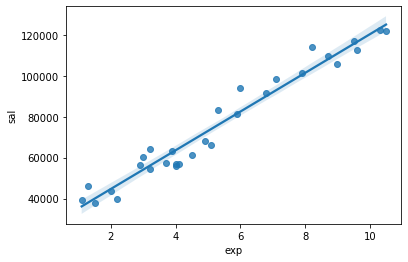

In [47]:
sns.regplot(x="exp" , y="sal" , data=salary)

## Model for Salary Hike

In [48]:
model = smf.ols('sal~exp',data=salary).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        19:16:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [51]:
print(model.tvalues, '\n', model.pvalues)

Intercept    11.346940
exp          24.950094
dtype: float64 
 Intercept    5.511950e-12
exp          1.143068e-20
dtype: float64


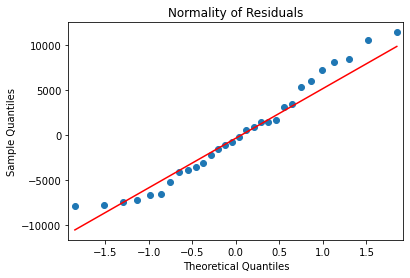

In [52]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normality of Residuals')
plt.show()

rsquared value is 68% , t value is greater than p value and p value is less than α. So this means the model is good.

## Prediction using the model

In [53]:
df = pd.Series([1.2,4.7,2.7,1.5,4.5])
df

0    1.2
1    4.7
2    2.7
3    1.5
4    4.5
dtype: float64

In [54]:
df_pred = pd.DataFrame(df,columns=['exp'])

In [55]:
model.predict(df_pred)

0    37132.154984
1    70207.023110
2    51307.098467
3    39967.143681
4    68317.030645
dtype: float64